In [1]:
import requests 
import json
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def get_throughput(node, port, ts=None, te=None):
    out_url = "http://graphite.es.net/snmp/west/%s/interface/%s/out?begin=%d&end=%d&calc=30"% (node, port, ts, te)
    in_url  = "http://graphite.es.net/snmp/west/%s/interface/%s/in?begin=%d&end=%d&calc=30" % (node, port, ts, te)
    r = requests.get(out_url).text
    res_out = json.loads(r)
    
    r = requests.get(in_url).text
    res_in = json.loads(r)

    return {'out': np.array(res_out['data']), 'in': np.array(res_in['data'])}


   # verified
alcf2nersc_esnet = (('star-cr5', 'to_anl_hpc_ip-a_v4v6'), ('chic-cr5', 'to_star-cr5_ip-a'), \
                    ('chic-cr5', 'to_star-cr5_ip-b'), ('kans-cr5', 'to_chic-cr5_ip-a'), \
                    ('denv-cr5', 'to_kans-cr5_ip-a'), ('sacr-cr5', 'to_denv-cr5_ip-a'), \
                    ('sunn-cr5', 'to_sacr-cr5_ip-a'), ('sunn-cr5', 'to_nersc_ip-a'))

nersc2alcf_esnet = (('sunn-cr5', 'to_nersc_ip-a'),    ('sacr-cr5', 'to_sunn-cr5_ip-a'),\
                    ('denv-cr5', 'to_sacr-cr5_ip-a'), ('kans-cr5', 'to_denv-cr5_ip-a'),\
                    ('chic-cr5', 'to_kans-cr5_ip-a'), ('star-cr5', 'to_chic-cr5_ip-a'), \
                    ('star-cr5', 'to_chic-cr5_ip-b'), ('star-cr5', 'to_anl_hpc_ip-a_v4v6'))

In [5]:
def get_path_throughput(path, ts, te):
    _ret = {}
    for node, port in path:
        _thro = get_throughput(node, port, ts, te)
        _ret[(node, port)] = _thro
    return _ret

In [15]:
get_path_throughput(alcf2nersc_esnet, 1531766346-1800, 1531766346)

{('chic-cr5',
  'to_star-cr5_ip-a'): {'in': array([[  1.53176454e+09,   2.00224636e+08],
         [  1.53176457e+09,   1.71918441e+08],
         [  1.53176460e+09,   1.54606032e+08],
         [  1.53176463e+09,   2.01495630e+08],
         [  1.53176466e+09,   2.22522833e+08],
         [  1.53176469e+09,   2.27037865e+08],
         [  1.53176472e+09,   2.76998090e+08],
         [  1.53176475e+09,   2.38890373e+08],
         [  1.53176478e+09,   3.07059898e+08],
         [  1.53176481e+09,   4.56119776e+08],
         [  1.53176484e+09,   3.21600822e+08],
         [  1.53176487e+09,   2.78041523e+08],
         [  1.53176490e+09,   5.72559044e+08],
         [  1.53176493e+09,   4.75205536e+08],
         [  1.53176496e+09,   2.29587781e+08],
         [  1.53176499e+09,   1.87449629e+08],
         [  1.53176502e+09,   3.91852123e+08],
         [  1.53176505e+09,   6.20394685e+08],
         [  1.53176508e+09,   4.02885172e+08],
         [  1.53176511e+09,   4.17048125e+08],
         [  1.5317

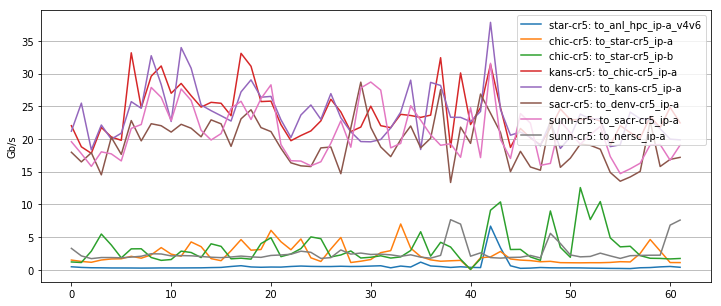

In [40]:
legend = []
plt.figure(figsize=(12,5))
for _node in _res:
    node, port = _node
    legend.append(node + ": " + port)
    #print(node)
    _in = _res[_node]['in'][:, 1]
    in_thro = _in * 8 / (2**30)
    #print(in_thro)
    _out = _res[_node]['out']
    plt.plot(in_thro)
plt.legend(legend)
ax = plt.axes()
ax.yaxis.grid()
plt.ylabel("Gb/s")
plt.show()